In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Helper Function for Text Cleaning:

Implement a Helper Function as per Text Preprocessing Notebook and Complete the following pipeline.

In [2]:
# necessary libraries
import pandas as pd
import numpy as np

#### Lower case function

In [3]:
# defining a function to convert the lower case
def lower_order(text):
  small_order_Text = text.lower()
  return small_order_Text


  #Test:
sample_text = "Hello, World!"
print(lower_order(sample_text))


hello, world!


#### url remover function

In [4]:
import re
# define a function for removing the url
def remove_url(text):
  url_free_text = re.sub(r'http\S+|www\S+', '', text)
  return url_free_text

#test
sample_text = "Check out my website: https://www.example.com"
print(remove_url(sample_text))

Check out my website: 


#### Emoji removing function

In [5]:
# define emoji removing function
def remove_emoji(text):
  emoji_free_text = re.compile("["
      u"\U0001F600-\U0001F64F"  # emoticons
      u"\U0001F300-\U0001F5FF"  # symbols & pictographs
      u"\U0001F680-\U0001F6FF"  # transport & map symbols
      u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
      u"\U00002702-\U000027B0"
      u"\U000024C2-\U0001F251"
  "]", flags=re.UNICODE).sub(r'', text)
  return emoji_free_text
#test
sample_text = "I love this emoji: 😊"
print(remove_emoji(sample_text))

I love this emoji: 


#### Unwanted character remover function

In [6]:
# define unwanted character remover
def remove_unwanted_characters(text):
  #remove user mentions
  text = re.sub("@[A-Za-z0-9_]+"," ",text)
  # remove hashtags
  text = re.sub("#[A-Za-z0-9_]+","", text)
  # remove punctuation
  text = re.sub("[^0-9A-Za-z ]", "" , text)
  #remove emojis
  text = remove_emoji(text)
  # remove double spaces
  text = text.replace('  ',"")
  return text.strip()

#test
sample_text = "Hello, # World! 😊"
print(remove_unwanted_characters(sample_text))



HelloWorld


### Text Normalization

#### Lemmatization

In [7]:
# necessary libraries
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize, pos_tag
import nltk
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

def lemmatize_text(text):
  lemma_tokens =[]
  wordnet = WordNetLemmatizer()
  lemma_tokens = [wordnet.lemmatize(token, pos = 'v') for token in text]

  return lemma_tokens

#test
sample_text = "running"
print(lemmatize_text(sample_text))

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


['r', 'u', 'n', 'n', 'i', 'n', 'g']


#### Stopword removing function

In [8]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
# define function for removing the stop word
def remove_stopwords(text):
  result_tokens = []
  for token in text:
    if token not in stop_words:
      result_tokens.append(token)
  return result_tokens

#test
sample_text = ['My', 'name', 'is', 'Dawa', 'Tamang', '.']
print(remove_stopwords(sample_text))

['My', 'name', 'Dawa', 'Tamang', '.']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#### Skimming function

In [9]:
from nltk.stem import  PorterStemmer
# define skimming function
def skimming(text):
  stem_tokens = []
  porter = PorterStemmer()
  for token in text:
    stem_tokens.append(porter.stem(token))
  return stem_tokens

#test
sample_text = ['I', 'am', 'swimming', 'right', 'now', '.']
print(skimming(sample_text))

['i', 'am', 'swim', 'right', 'now', '.']


# Build a Text Cleaning Pipeline

In [10]:
def text_cleaning_pipeline(dataset, rule = "lemmatize"):
  """
  This...
  """
  # Convert the input to small/lower order.
  data = lower_order(dataset)
  # Remove URLs
  data =remove_url(data)
  # Remove emojis
  data = remove_emoji(data)
  # Remove all other unwanted characters.
  data = remove_unwanted_characters(data)
  # Create tokens.
  tokens = data.split()
  # Remove stopwords:
  tokens = remove_stopwords(tokens)
  if rule == "lemmatize":
    tokens = lemmatize_text(tokens)
  elif rule == "stem":
    tokens = skimming(tokens)
  else:
    print("Pick between lemmatize or stem")


  return " ".join(tokens)


# Text Classification using Machine Learning Models


### 📝 Instructions: Trump Tweet Sentiment Classification

1. **Load the Dataset**  
   Load the dataset named `"trump_tweet_sentiment_analysis.csv"` using `pandas`. Ensure the dataset contains at least two columns: `"text"` and `"label"`.

2. **Text Cleaning and Tokenization**  
   Apply a text preprocessing pipeline to the `"text"` column. This should include:
   - Lowercasing the text  
   - Removing URLs, mentions, punctuation, and special characters  
   - Removing stopwords  
   - Tokenization (optional: stemming or lemmatization)
   - "Complete the above function"

3. **Train-Test Split**  
   Split the cleaned and tokenized dataset into **training** and **testing** sets using `train_test_split` from `sklearn.model_selection`.

4. **TF-IDF Vectorization**  
   Import and use the `TfidfVectorizer` from `sklearn.feature_extraction.text` to transform the training and testing texts into numerical feature vectors.

5. **Model Training and Evaluation**  
   Import **Logistic Regression** (or any machine learning model of your choice) from `sklearn.linear_model`. Train it on the TF-IDF-embedded training data, then evaluate it using the test set.  
   - Print the **classification report** using `classification_report` from `sklearn.metrics`.


## Load Dataset

In [12]:
df = pd.read_csv("/content/drive/MyDrive/Artificial Intelligence and Machine Learning./week8/trum_tweet_sentiment_analysis.csv")
print("Sample data:\n",df.head())

Sample data:
                                                 text  Sentiment
0  RT @JohnLeguizamo: #trump not draining swamp b...          0
1  ICYMI: Hackers Rig FM Radio Stations To Play A...          0
2  Trump protests: LGBTQ rally in New York https:...          1
3  "Hi I'm Piers Morgan. David Beckham is awful b...          0
4  RT @GlennFranco68: Tech Firm Suing BuzzFeed fo...          0


## Check for necessary columns


In [13]:
assert 'text' in df.columns and 'Sentiment' in df.columns, "Missing 'text' or 'label' columns."

## Text preprocessing function

In [14]:
# Text preprocessing functon
df['clean_text'] = df['text'].apply(text_cleaning_pipeline)

## Split dataset

In [15]:
# import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
# split datset
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['Sentiment'], test_size=0.2, random_state=42)

## TF-IDF vectorization

In [16]:
# TF-IDF vectorization
vetorizer = TfidfVectorizer()
X_train_vec = vetorizer.fit_transform(X_train)
X_test_vec = vetorizer.transform(X_test)

## Model Training

In [17]:
# Model Training
model = LogisticRegression()
model.fit(X_train_vec, y_train)

LogisticRegression()

## Prediction and evaluation


Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.97      0.96    248563
           1       0.93      0.90      0.91    121462

    accuracy                           0.94    370025
   macro avg       0.94      0.93      0.94    370025
weighted avg       0.94      0.94      0.94    370025



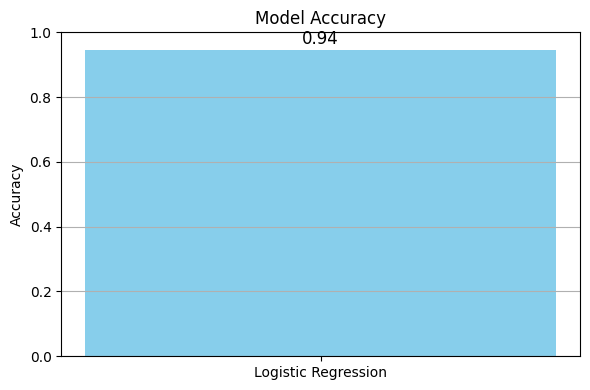

In [18]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
# Prediction and evaluation
y_pred = model.predict(X_test_vec)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

#Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)


# plot for accuracy graph
plt.figure(figsize=(6, 4))
plt.bar(['Logistic Regression'], [accuracy], color='skyblue')
plt.ylim(0, 1)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.text(0, accuracy + 0.02, f"{accuracy:.2f}", ha='center', fontsize=12)
plt.grid(axis='y')
plt.tight_layout()
plt.show()